In [473]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile 

import statsmodels.formula.api as smf

%matplotlib inline

In [474]:
zf = zipfile.ZipFile('nyc-property-sales.zip') # read zip file

In [475]:
df = pd.read_csv(zf.open('nyc-property-sales/nyc-rolling-sales.csv'))  #read one of the csv files inside that zip file

In [476]:
df.shape

(84548, 22)

In [477]:
df = df.drop(df.columns[0] , axis=1)

In [478]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [479]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [480]:
#df['SALE PRICE'] = df['SALE PRICE'].astype(float)
#df['SALE PRICE'] = df['SALE PRICE'].astype(dtype=np.int64)
#grades["StudentID"] = grades["StudentID"].astype(dtype=np.int64)

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'],errors='coerce')


In [481]:
df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [482]:
df['ZIP CODE'].unique()

array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [483]:
df = df.rename(columns={"SALE PRICE": "price", "LOT": "lot", "YEAR BUILT": "ybuilt", 
                                   "RESIDENTIAL UNITS": "runits", "COMMERCIAL UNITS" : "cunits", "TOTAL UNITS": "tunits", 
                                   "LAND SQUARE FEET":  "lsqf", "GROSS SQUARE FEET": "gsqf", "TAX CLASS AT TIME OF SALE": "taxclass", "SALE DATE": "sdate", "ZIP CODE": "zipcode"})

In [484]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,lot,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,runits,cunits,tunits,lsqf,gsqf,ybuilt,taxclass,BUILDING CLASS AT TIME OF SALE,price,sdate
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [485]:
df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
lot                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
zipcode                             int64
runits                              int64
cunits                              int64
tunits                              int64
lsqf                               object
gsqf                               object
ybuilt                              int64
taxclass                            int64
BUILDING CLASS AT TIME OF SALE     object
price                             float64
sdate                              object
dtype: object

In [486]:
df['ybuilt'].min()

0

In [487]:
df = df[(df['ybuilt'] > 1111) & (df['zipcode'] > 0)]

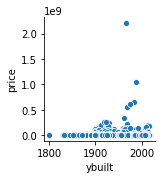

In [488]:
g = sns.pairplot(df, #hue = "ybuilt", 
                 y_vars = ["price"], 
                 x_vars = ["ybuilt"] )

In [489]:
#total missing values
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
lot                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
zipcode                               0
runits                                0
cunits                                0
tunits                                0
lsqf                                  0
gsqf                                  0
ybuilt                                0
taxclass                              0
BUILDING CLASS AT TIME OF SALE        0
price                             12974
sdate                                 0
dtype: int64

In [490]:
#total missing values
df = df.dropna()
df.shape

(64550, 21)

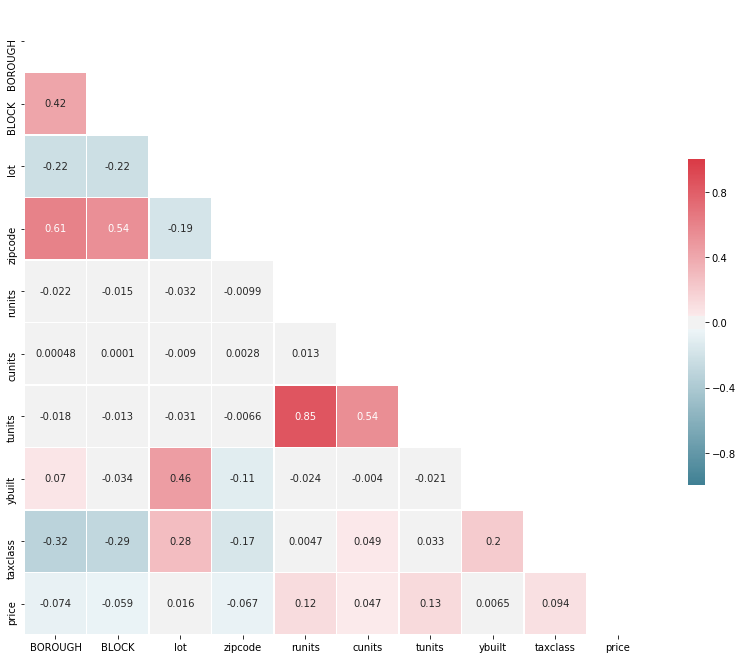

In [491]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap# Genera 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#show correlation of stats via heatmap
plt.subplots(figsize=(14,15))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, annot=True,
            square=True, linewidths=.6, cbar_kws={"shrink": .4})

In [492]:
result = smf.ols('price ~ runits + tunits + taxclass - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     772.8
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:50:21   Log-Likelihood:            -1.1412e+06
No. Observations:               64550   AIC:                         2.282e+06
Df Residuals:                   64547   BIC:                         2.282e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
runits      4.026e+04   5670.575      7.099      0.000    2.91e+04    5.14e+04
tunits      5.171e+04   4779.398     10.820      0.000    4.23e+04    6.11e+04
taxclass    8.046e+05    2.6e+04     30.943      0.000    7.54e+05    8.56e+05
==============================================================================
Omnibus:                   276717.885   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1316489835968.023
Skew:                         127.783   Prob(JB):                         0.00
Kurtosis:                   22125.656   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

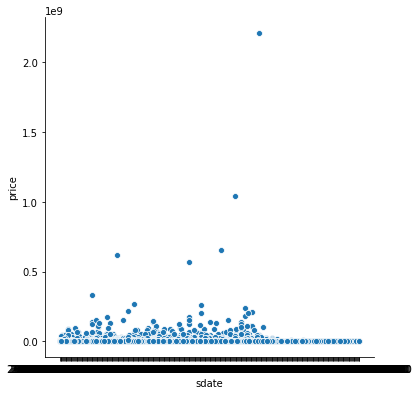

In [493]:
g = sns.pairplot(df, #hue = "ybuilt", 
                 y_vars = ["price"], 
                 x_vars = ["sdate"] , height = 5.5)

In [494]:
#still using gradedata.csv
#check df.head() if needed

#Standard Deviation Method

meangrade = df['price'].mean()
stdgrade = df['price'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copydf = df.copy() #to not mess up the original df
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

copydf.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,lot,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,runits,cunits,tunits,lsqf,gsqf,ybuilt,taxclass,BUILDING CLASS AT TIME OF SALE,price,sdate
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00


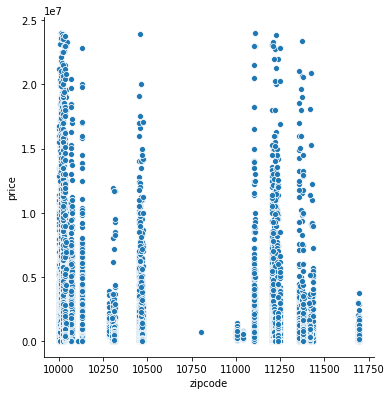

In [495]:
g = sns.pairplot(copydf, #hue = "ybuilt", 
                 y_vars = ["price"], 
                 x_vars = ["zipcode"] , height = 5.5)

In [496]:
copydf.describe()

,BOROUGH,BLOCK,lot,zipcode,runits,cunits,tunits,ybuilt,taxclass,price
count,64291.000000,64291.000000,64291.000000,64291.000000,64291.000000,64291.000000,64291.000000,64291.000000,64291.000000,6.429100e+04
mean,2.965190,4287.441290,309.886812,10872.057784,1.859840,0.148434,2.024762,1949.488404,1.592649,9.492394e+05
std,1.233774,3453.674161,571.565421,547.282009,12.998916,9.039010,15.902377,34.504995,0.729091,1.805214e+06
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,1800.000000,1.000000,0.000000e+00
25%,2.000000,1386.000000,20.000000,10309.000000,0.000000,0.000000,1.000000,1925.000000,1.000000,2.350000e+05
50%,3.000000,3500.000000,46.000000,11211.000000,1.000000,0.000000,1.000000,1942.000000,1.000000,5.253000e+05
75%,4.000000,6300.000000,151.000000,11354.000000,2.000000,0.000000,2.000000,1970.000000,2.000000,9.266070e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.400000e+07


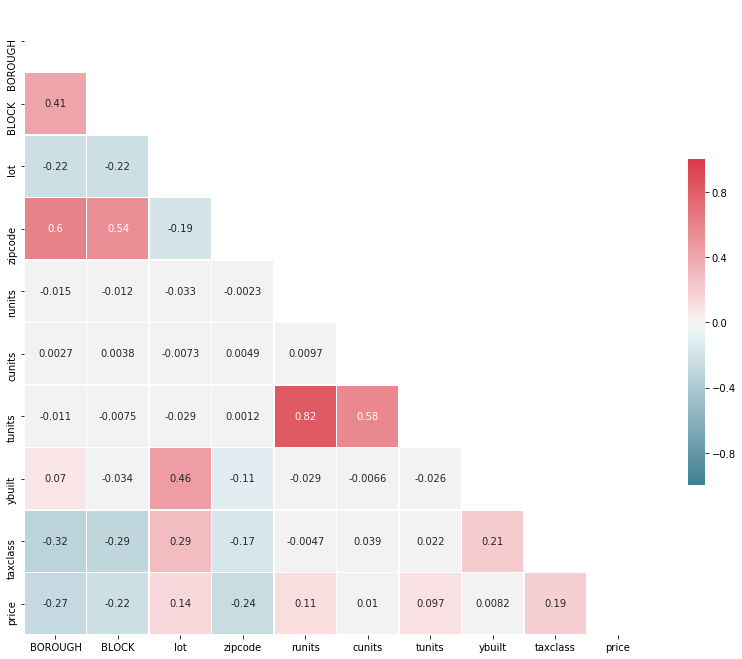

In [497]:
# Generate a mask for the upper triangle
mask = np.zeros_like(copydf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap# Genera 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#show correlation of stats via heatmap
plt.subplots(figsize=(14,15))
sns.heatmap(copydf.corr(), mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, annot=True,
            square=True, linewidths=.6, cbar_kws={"shrink": .4})

In [498]:
result = smf.ols('price ~ BOROUGH + BLOCK + lot + runits + zipcode + taxclass - 1', data=copydf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     4591.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:50:45   Log-Likelihood:            -1.0138e+06
No. Observations:               64291   AIC:                         2.028e+06
Df Residuals:                   64285   BIC:                         2.028e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BOROUGH    -2.852e+05   6555.913    -43.505      0.000   -2.98e+05   -2.72e+05
BLOCK        -63.5120      2.226    -28.529      0.000     -67.875     -59.149
lot          166.5976     12.500     13.328      0.000     142.099     191.097
runits      1.535e+04    518.254     29.626      0.000    1.43e+04    1.64e+04
zipcode      146.2385      2.797     52.275      0.000     140.755     151.722
taxclass    2.449e+05   1.02e+04     24.009      0.000    2.25e+05    2.65e+05
==============================================================================
Omnibus:                    70117.032   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6549980.799
Skew:                           5.581   Prob(JB):                         0.00
Kurtosis:                      51.172   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

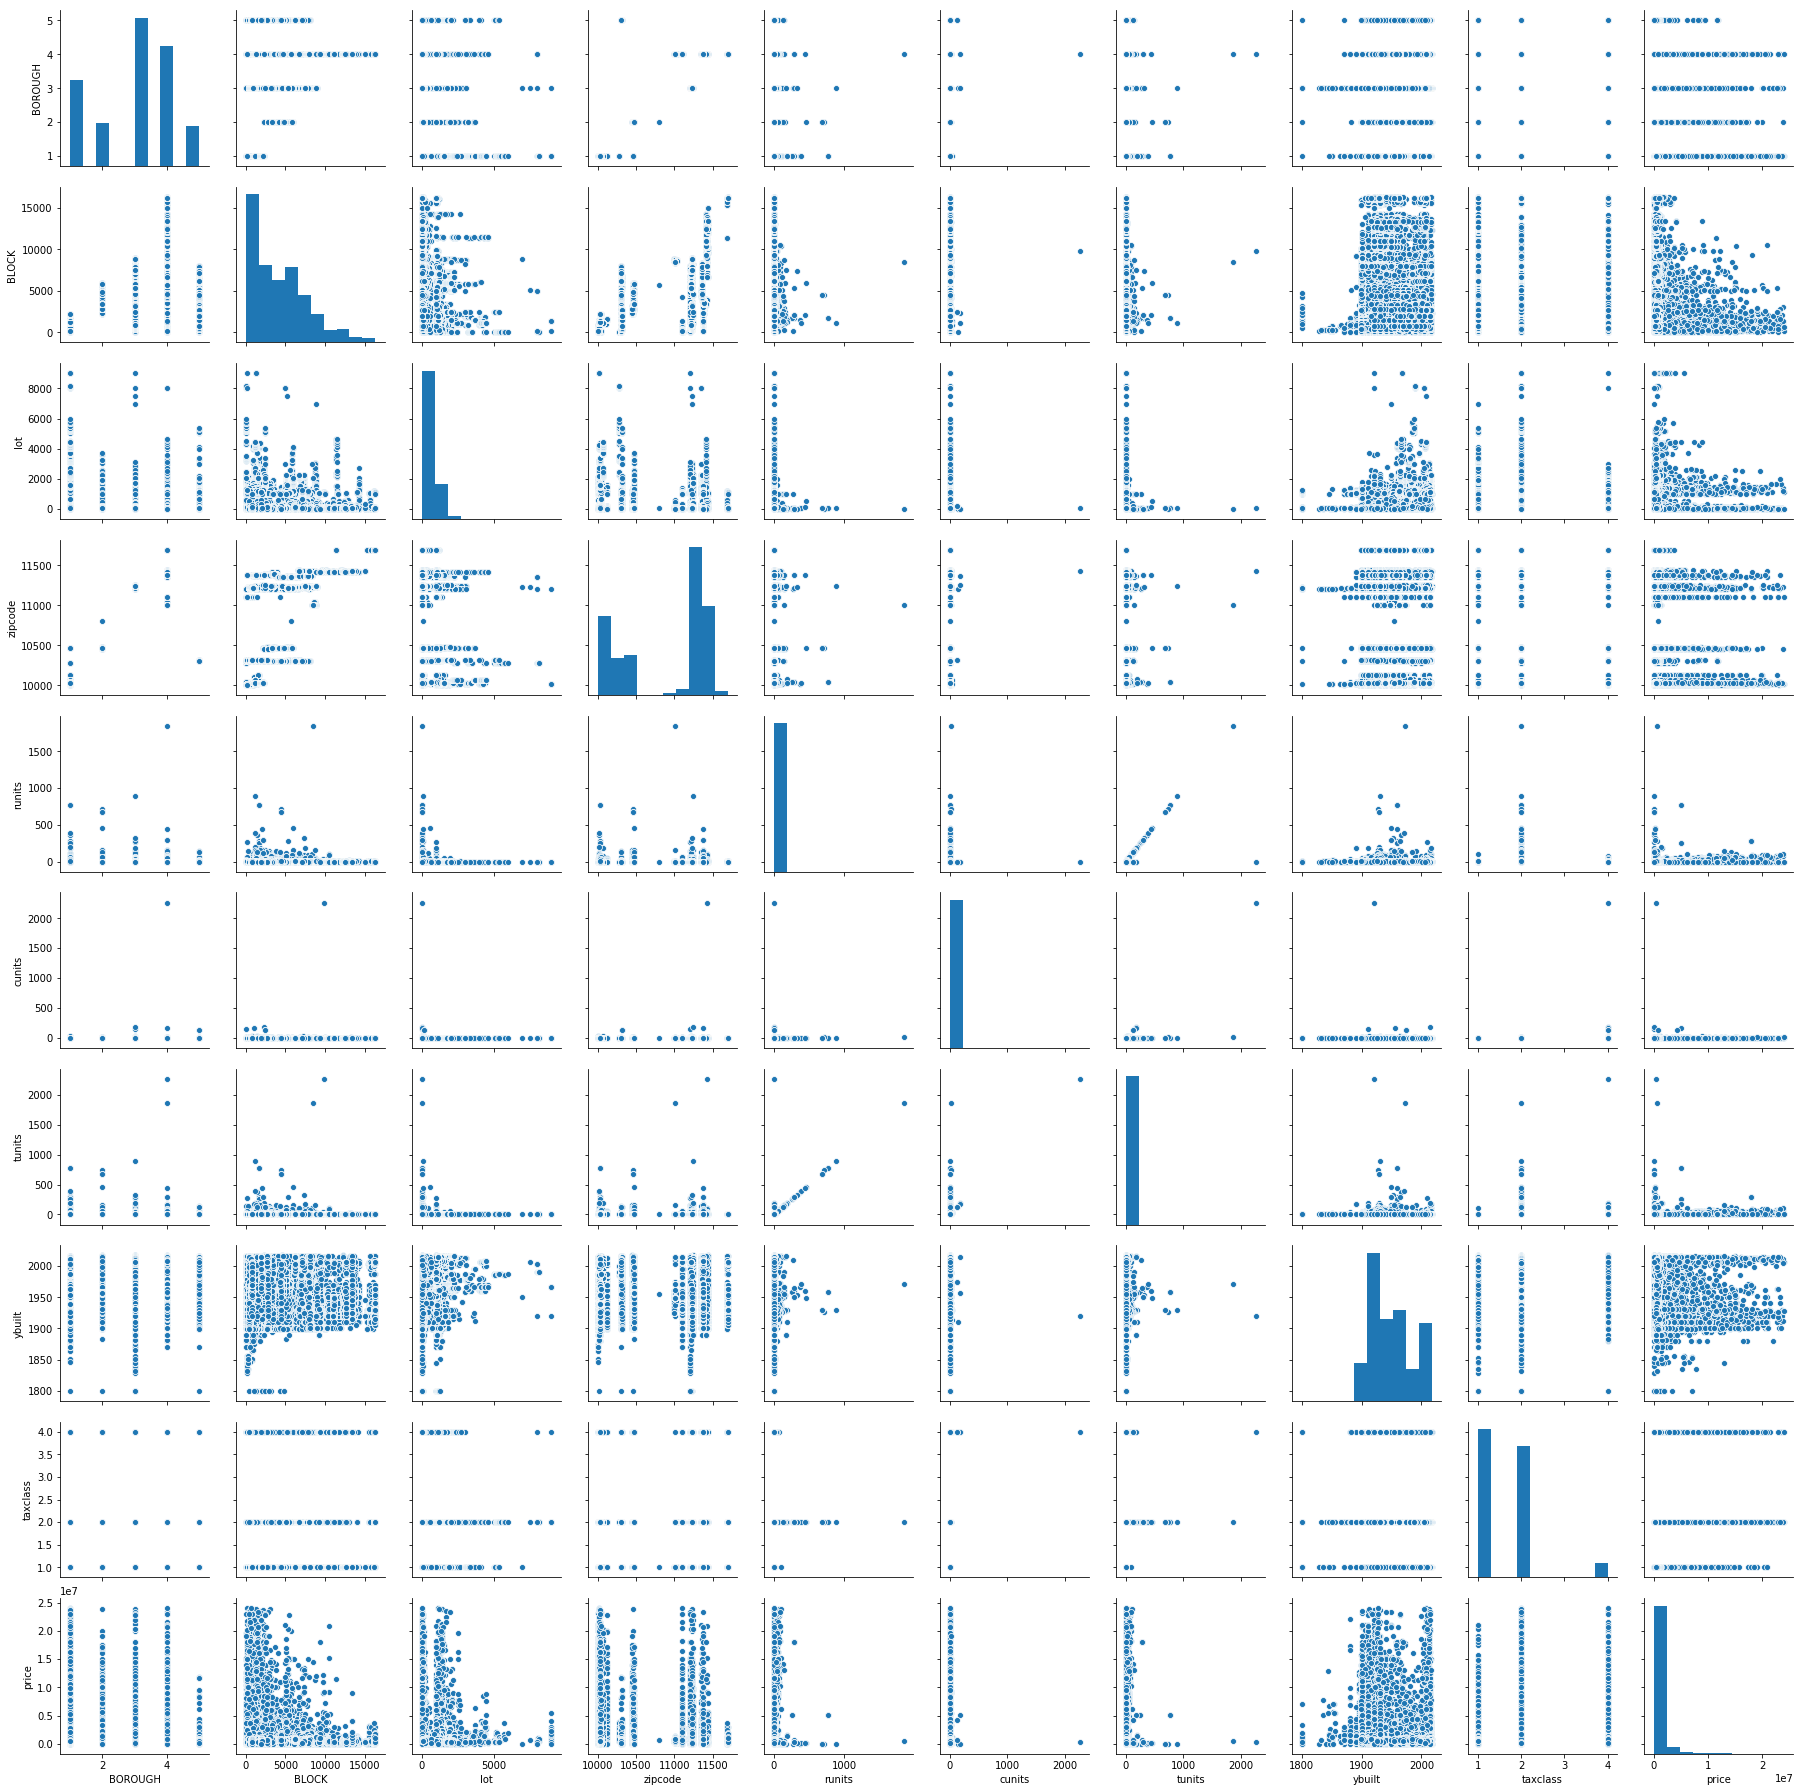

In [392]:
g = sns.pairplot(copydf)

In [499]:
result = smf.ols('price ~ BOROUGH + BLOCK + zipcode - 1', data=copydf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8362.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:50:50   Log-Likelihood:            -1.0147e+06
No. Observations:               64291   AIC:                         2.029e+06
Df Residuals:                   64288   BIC:                         2.029e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BOROUGH    -3.472e+05   6345.368    -54.712      0.000    -3.6e+05   -3.35e+05
BLOCK        -81.4445      2.182    -37.322      0.000     -85.722     -77.167
zipcode      213.4376      1.770    120.573      0.000     209.968     216.907
==============================================================================
Omnibus:                    72425.856   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6803747.074
Skew:                           5.919   Prob(JB):                         0.00
Kurtosis:                      51.987   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [436]:
#Define bins as 0-59, 60-69, 70-79, 80-89, 90-100
bins = [0, 500, 1000, 1500, 2000, 6000]

# Create names for the four groups
group_names = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-6000']

#make new column with letter grades
ncdf = copydf.copy()
ncdf['BLOCK'] = pd.cut(ncdf['BLOCK'], bins, labels=group_names)
ncdf.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,lot,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,runits,cunits,tunits,lsqf,gsqf,ybuilt,taxclass,BUILDING CLASS AT TIME OF SALE,price,sdate
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,0-500,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,0-500,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,0-500,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,0-500,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,0-500,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00


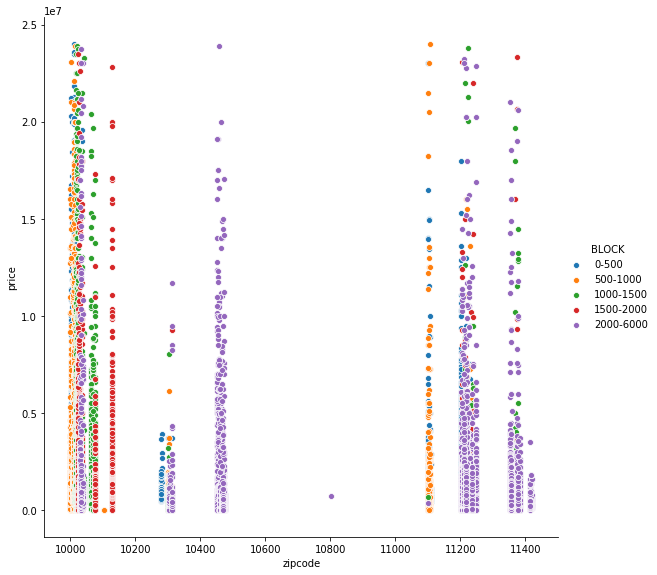

In [500]:
g = sns.pairplot(ncdf, hue = "BLOCK", 
                 y_vars = ["price"], 
                 x_vars = ["zipcode"], height = 8.0)

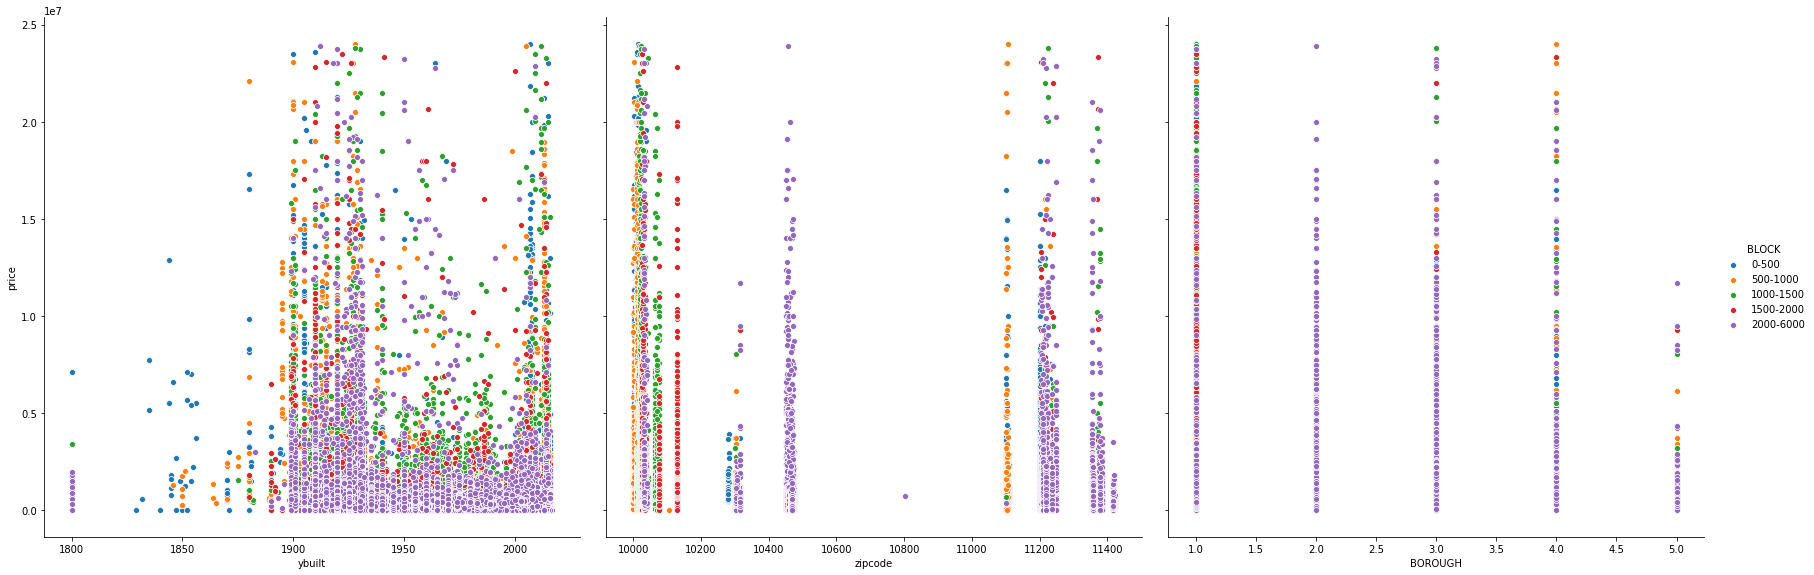

In [445]:
g = sns.pairplot(ncdf, hue = "BLOCK", 
                 y_vars = ["price"], 
                 x_vars = ["ybuilt", "zipcode", "BOROUGH"], height = 8.0)

In [501]:
ncdf.sdate.min(), ncdf.sdate.max()

('2016-09-01 00:00:00', '2017-08-31 00:00:00')

In [502]:
import datetime as dt
ddf = copydf.copy()
ddf['sdate'] = pd.to_datetime(ncdf['sdate'])

#ddf['sdate'] = pd.to_numeric(ncdf['sdate'],errors='coerce')
ddf['sdate'] = ddf['sdate'].map(dt.datetime.toordinal) - 736208

In [503]:
ddf.sdate.min(), ddf.sdate.max()

(0, 364)

In [504]:
ddf.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
lot                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
zipcode                             int64
runits                              int64
cunits                              int64
tunits                              int64
lsqf                               object
gsqf                               object
ybuilt                              int64
taxclass                            int64
BUILDING CLASS AT TIME OF SALE     object
price                             float64
sdate                               int64
dtype: object

KeyboardInterrupt: 

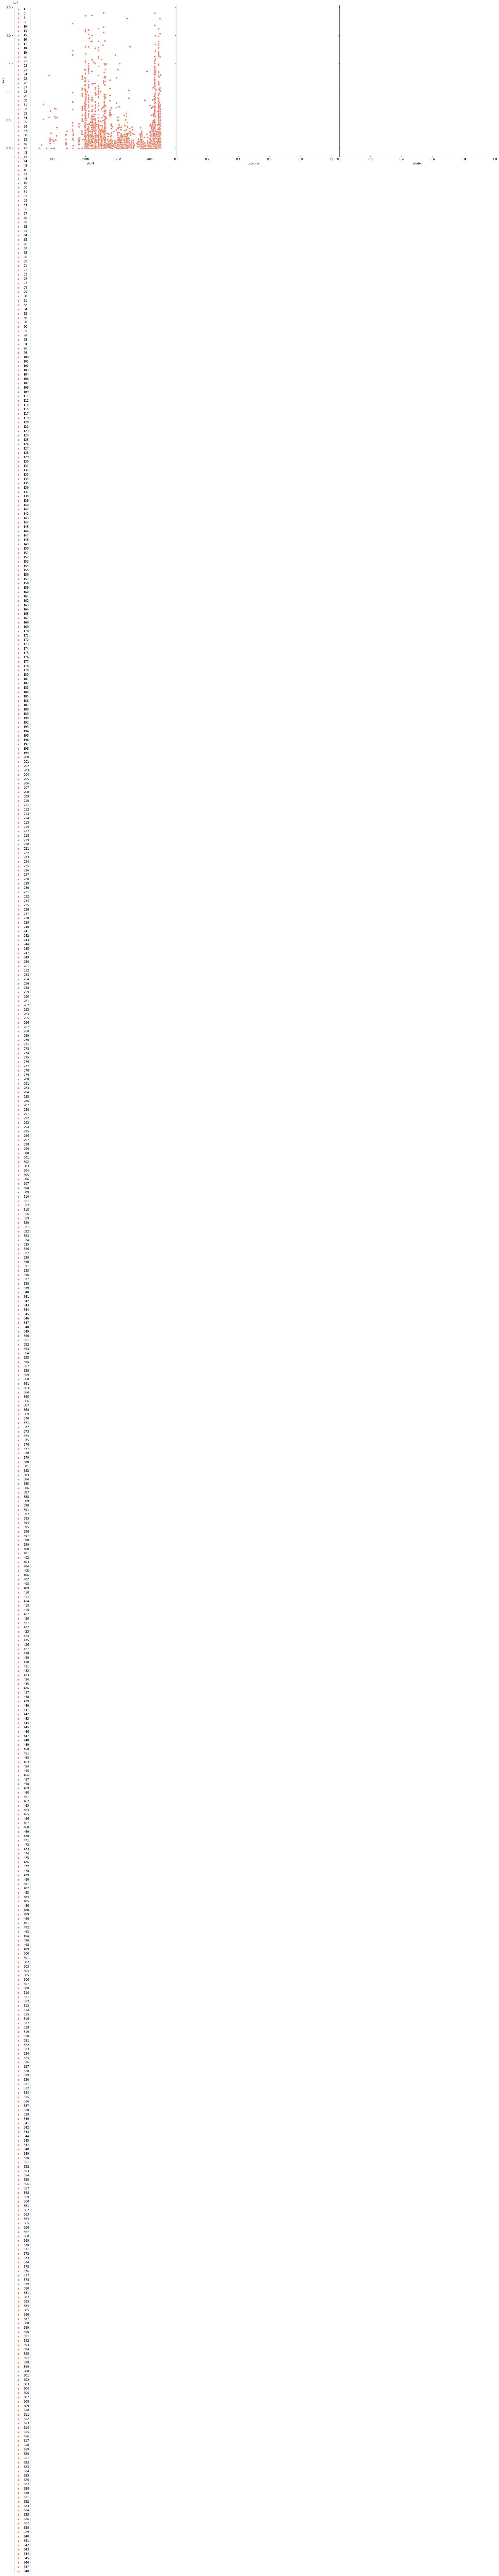

In [472]:
g = sns.pairplot(ddf, hue = "BLOCK", 
                 y_vars = ["price"], 
                 x_vars = ["ybuilt", "zipcode", "sdate"], height = 8.0)

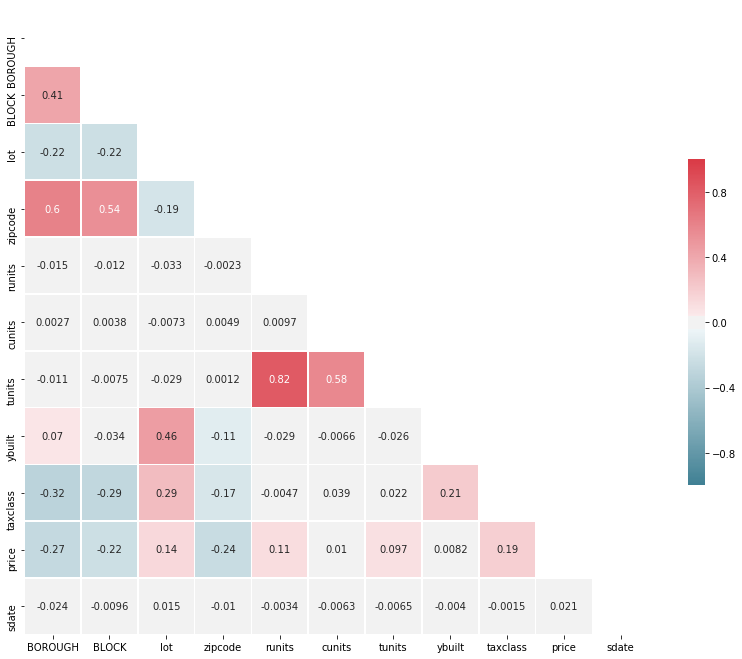

In [505]:
# Generate a mask for the upper triangle
mask = np.zeros_like(ddf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap# Genera 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#show correlation of stats via heatmap
plt.subplots(figsize=(14,15))
sns.heatmap(ddf.corr(), mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, annot=True,
            square=True, linewidths=.6, cbar_kws={"shrink": .4})

In [506]:
result = smf.ols('price ~ BOROUGH + taxclass + zipcode - 1', data=copydf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     8277.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:53:20   Log-Likelihood:            -1.0148e+06
No. Observations:               64291   AIC:                         2.030e+06
Df Residuals:                   64288   BIC:                         2.030e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BOROUGH      -3.5e+05   6385.260    -54.809      0.000   -3.62e+05   -3.37e+05
taxclass    3.411e+05   9830.797     34.700      0.000    3.22e+05     3.6e+05
zipcode      131.8228      2.716     48.542      0.000     126.500     137.145
==============================================================================
Omnibus:                    71269.314   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6403977.965
Skew:                           5.768   Prob(JB):                         0.00
Kurtosis:                      50.514   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

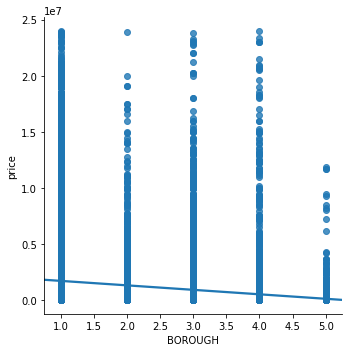

In [507]:
#tips = sns.load_dataset("tips")
g = sns.lmplot(x="BOROUGH", y="price", data=ddf)